In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [2]:
#load and review dataset
df=pd.read_csv("student_scores.csv")

In [3]:
df.head()
#print first five rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.dtypes
#datatypes of the variables

Hours     float64
Scores      int64
dtype: object

In [5]:
x = df.columns.to_series().groupby(df.dtypes).groups
x
#for viewing all the columns

{int64: ['Scores'], float64: ['Hours']}

In [6]:
df.shape
#get the shape

(25, 2)

In [7]:
df.info()
#get the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.isnull().sum()
#missing values

Hours     0
Scores    0
dtype: int64

In [9]:
#no missing values

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

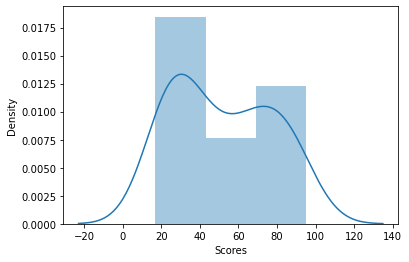

In [10]:
sns.distplot(df["Scores"])

C:\Users\sharo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

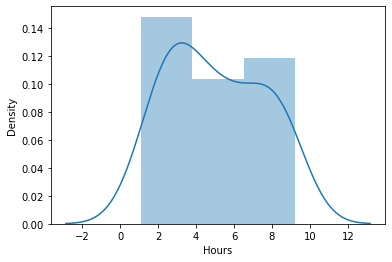

In [11]:
sns.distplot(df["Hours"])

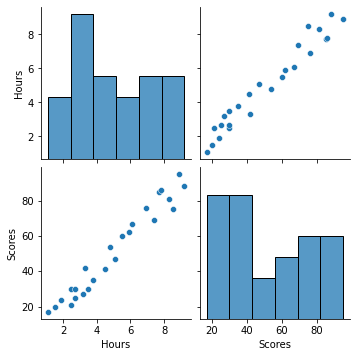

In [12]:
sns.pairplot(data=df)

In [13]:
#from pairplot we can infer that there exist some linear relation between hours and scores.So linear regression can be used.

<AxesSubplot:>

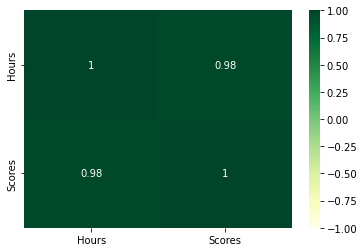

In [14]:
sns.heatmap(data =df.corr(), cmap = "YlGn", vmin = -1, vmax = 1, annot = True)
#Visualizing correlation using heatmap

<AxesSubplot:>

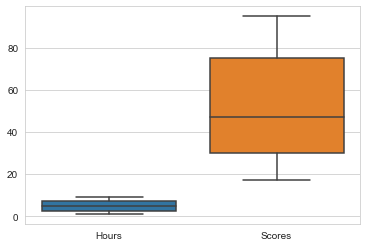

In [15]:
sns.set_style("whitegrid")
sns.boxplot(data = df)

In [16]:
#no outliers

<AxesSubplot:ylabel='count'>

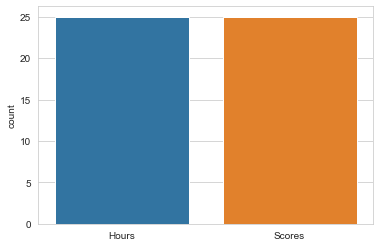

In [17]:
sns.countplot(data=df)

In [18]:
#Model building

In [19]:
x = y = df[['Hours']]
y = df[['Scores']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [21]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [22]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for Hours is 9.788566686749046


In [23]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.370815382341881


In [24]:
reg_model.score(X_train, y_train)
#training model

0.9484997422695115

In [25]:
reg_model.score(X_test, y_test)
#testing model

0.9568211104435257

In [26]:
y_pred = reg_model.predict(X_test)

In [27]:
# RMSE score 
np.sqrt(mean_squared_error(y_test, y_pred))

4.792191274636315

In [28]:
#r2 score
r2_score(y_test, y_pred)

0.9568211104435257

In [29]:
# R2 value is very close to 1.It is a good linear regression model.

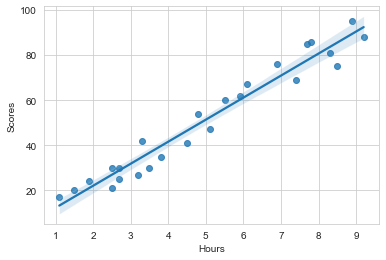

In [30]:
sns.regplot(x="Hours", y="Scores", data=df);